In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank Churn Modelling.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
1029,15688071,Collins,609,Spain,Male,53,10,0.00,1,1,1,154642.91,0
4527,15593900,Belousov,705,France,Male,38,1,189443.72,1,0,1,106648.58,0
2097,15689168,Munro,531,Spain,Male,37,1,143407.29,2,0,1,84402.46,0
6095,15741652,McLean,600,Spain,Male,37,8,177657.35,1,1,1,77142.32,0
8679,15753092,He,791,Germany,Male,35,5,129828.58,1,1,1,181918.26,1


In [5]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [8]:
df.duplicated("CustomerId").sum()

0

In [9]:
df.set_index("CustomerId")

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [10]:
#df1 = pd.DataFrame(data = df)

### Encode the catagorical Data

In [11]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.replace({"Geography":{"France":2,"Germany":1,"Spain":0,}},inplace=True)
df['Geography'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\2186067164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Geography":{"France":2,"Germany":1,"Spain":0,}},inplace=True)


Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
df['Gender'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\1953822826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)


Gender
0    5457
1    4543
Name: count, dtype: int64

In [16]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [17]:
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace=True)
df['Num Of Products'].value_counts()

Num Of Products
0    5084
1    4916
Name: count, dtype: int64

In [18]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [19]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [20]:
df.loc[(df['Balance']==0),"Churn"].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [21]:
df['Zero Balance']= np.where(df['Balance']>0,1,0)

<Axes: >

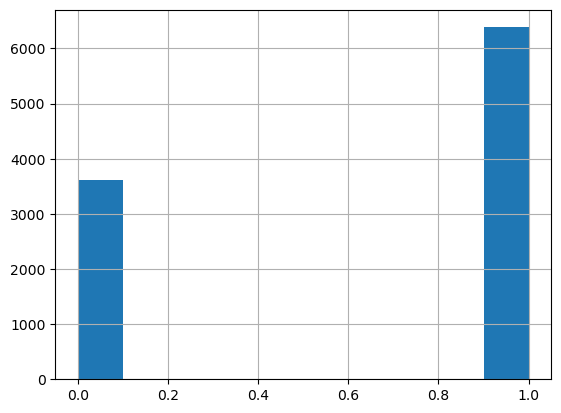

In [22]:
df['Zero Balance'].hist()

In [23]:
df.groupby(["Churn","Geography"]).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

### Define Label and Features

In [24]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [25]:
x = df.drop(["Surname","CustomerId","Churn"],axis=1)

In [26]:
y = df["Churn"]

In [27]:
x.shape,y.shape

((10000, 11), (10000,))

### Handeling Imbalanced Data

In [28]:
df["Churn"].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

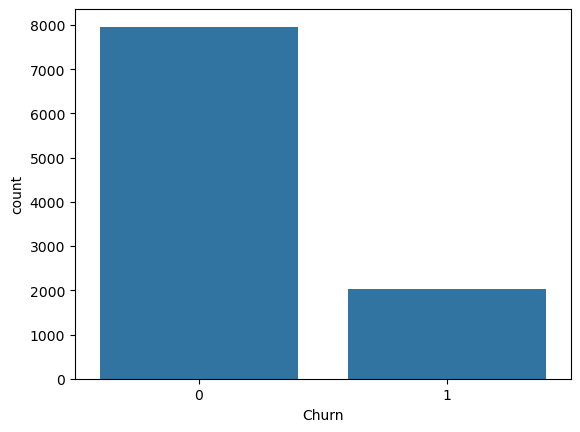

In [29]:
sns.countplot(x = "Churn",data=df)

### Random Under Sampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state=2529)
x_rus,y_rus = rus.fit_resample(x,y)

In [32]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [33]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [34]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

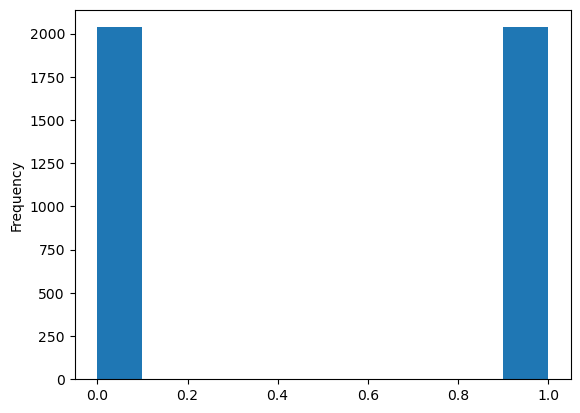

In [35]:
y_rus.plot(kind = 'hist')

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(random_state=2529)

In [38]:
x_ros,y_ros = ros.fit_resample(x,y)

In [39]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [40]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

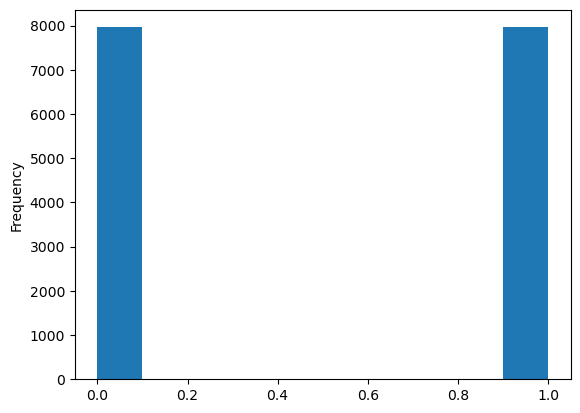

In [41]:
y_ros.plot(kind="hist")

### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

### split random under sample data

In [44]:
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(x_rus,y_rus, test_size=0.3, random_state=42)

### split random over sample data

In [45]:
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros,y_ros, test_size=0.3, random_state=42)

### Standardize Feature

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

### Standardize Original Data

In [48]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [49]:
x_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]] = sc.fit_transform(x_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])
x_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]] = sc.fit_transform(x_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

### Standardize Random under sample data

In [50]:
x_rus_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]] = sc.fit_transform(x_rus_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])
x_rus_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]] = sc.fit_transform(x_rus_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

### Standardize Random Over sample data

In [51]:
x_ros_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]] = sc.fit_transform(x_ros_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])
x_ros_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]] = sc.fit_transform(x_ros_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

### Support Vector Classifier Machine

In [52]:
from sklearn.svm import SVC

In [53]:
svc = SVC()
svc

SVC()

In [54]:
svc.fit(x_train,y_train)

SVC()

In [55]:
y_pred = svc.predict(x_test)

### under sample 

In [56]:
svc.fit(x_rus_train,y_rus_train)
y_rus_pred = svc.predict(x_rus_test)

### Over Sample

In [57]:
svc.fit(x_ros_train,y_ros_train)
y_ros_pred = svc.predict(x_ros_test)

### Model Accuracy

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
confusion_matrix(y_test,y_pred)

array([[2384,   32],
       [ 440,  144]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2416
           1       0.82      0.25      0.38       584

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.64      3000
weighted avg       0.84      0.84      0.81      3000



### Hyper Parameter Tuning On Raw Data

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {"C": [0.1,1,10],
              "gamma" :[1,0.1,0.01],
              "kernel" :["rbf"],
              "class_weight":["balanced"]}

In [63]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [64]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [65]:
grid_predictions = grid.predict(x_test)

In [66]:
confusion_matrix(y_test,grid_predictions)

array([[2030,  386],
       [ 259,  325]], dtype=int64)

In [67]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2416
           1       0.46      0.56      0.50       584

    accuracy                           0.79      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.79      0.79      3000



### Model Accuracy on under Sampling

In [68]:
confusion_matrix(y_rus_test,y_rus_pred)

array([[480, 160],
       [159, 424]], dtype=int64)

In [69]:
print(classification_report(y_rus_test,y_rus_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       640
           1       0.73      0.73      0.73       583

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



### Hyper parameter tuning on under Sampling

In [70]:
param_grid = {"C": [0.1,1,10],
              "gamma" :[1,0.1,0.01],
              "kernel" :["rbf"],
              "class_weight":["balanced"]}

In [71]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_rus_train,y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [72]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [73]:
grid_rus_predictions = grid_rus.predict(x_rus_test)

In [74]:
confusion_matrix(y_rus_test,grid_rus_predictions)

array([[486, 154],
       [173, 410]], dtype=int64)

In [75]:
print(classification_report(y_rus_test,grid_rus_predictions))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       640
           1       0.73      0.70      0.71       583

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



### Model Accuracy on over Sampling

In [76]:
confusion_matrix(y_ros_test,y_ros_pred)

array([[1827,  599],
       [ 583, 1769]], dtype=int64)

In [77]:
print(classification_report(y_ros_test,y_ros_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2426
           1       0.75      0.75      0.75      2352

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



### Hyper parameter tuning on Over Sampling

In [78]:
param_grid = {"C": [0.1,1,10],
              "gamma" :[1,0.1,0.01],
              "kernel" :["rbf"],
              "class_weight":["balanced"]}

In [79]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_ros_train,y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [80]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [81]:
grid_ros_predictions = grid_ros.predict(x_ros_test)

In [82]:
confusion_matrix(y_ros_test,grid_ros_predictions)

array([[2067,  359],
       [ 104, 2248]], dtype=int64)

In [83]:
print(classification_report(y_ros_test,grid_ros_predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2426
           1       0.86      0.96      0.91      2352

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



### Model Accuracy on Raw Data

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2416
           1       0.82      0.25      0.38       584

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.64      3000
weighted avg       0.84      0.84      0.81      3000



### Model Accuracy on under Sampling

In [85]:
print(classification_report(y_rus_test,y_rus_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       640
           1       0.73      0.73      0.73       583

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



### Model Accuracy on over Sampling

In [86]:
print(classification_report(y_ros_test,y_ros_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2426
           1       0.75      0.75      0.75      2352

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



### Hyper Parameter tuning on Raw Data

In [87]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2416
           1       0.46      0.56      0.50       584

    accuracy                           0.79      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.79      0.79      3000



### Hyper Parameter tuning on under Sampling

In [88]:
print(classification_report(y_rus_test,grid_rus_predictions))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       640
           1       0.73      0.70      0.71       583

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



### Hyper Parameter tuning on over Sampling

In [89]:
print(classification_report(y_ros_test,grid_ros_predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2426
           1       0.86      0.96      0.91      2352

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



The Over Sampling approach is the best model here because it achieves the highest accuracy (0.91) and weighted average F1-score (0.91). This indicates that it performs better at balancing precision and recall compared to the other methods.

### Save the model

In [90]:
import joblib

joblib.dump(grid_ros, "Over Sampling Bank Customer Churn.pkl")

['Over Sampling Bank Customer Churn.pkl']